
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Example dataset (replace with given X, y)
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X[:, 0] + 5 + np.random.randn(100) * 2
y = y.reshape(-1, 1)


In [3]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [4]:
class LinearRegressionRidge:
    def __init__(self, lr=0.01, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros((n_features, 1))
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            # Compute loss
            mse = np.mean((y - y_pred) ** 2)
            l2_penalty = self.reg_lambda * np.sum(self.w ** 2)
            loss = mse + l2_penalty
            self.losses.append(loss)

            # Gradients
            dw = (-2 / n_samples) * (X.T @ (y - y_pred)) + 2 * self.reg_lambda * self.w
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


In [5]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [6]:
model = LinearRegressionRidge(
    lr=0.05,
    epochs=1000,
    reg_lambda=0.1
)

model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


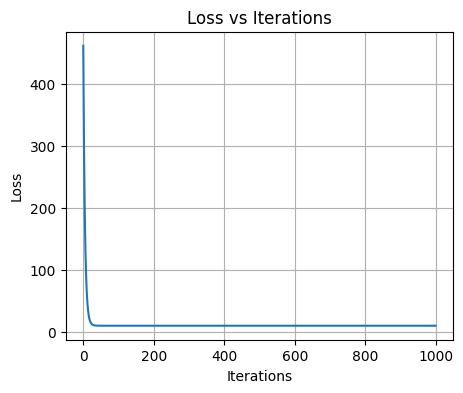

In [7]:
plt.figure(figsize=(5,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.show()


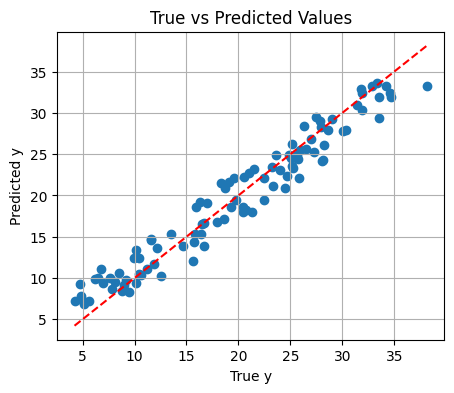

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(y, y_pred)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()


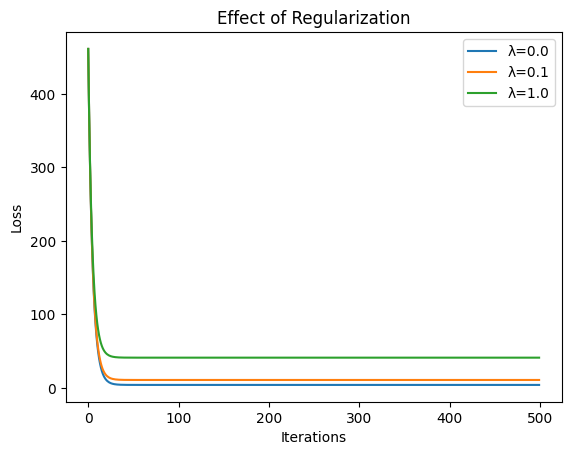

In [9]:
lambdas = [0.0, 0.1, 1.0]
for l in lambdas:
    model = LinearRegressionRidge(lr=0.05, epochs=500, reg_lambda=l)
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f"λ={l}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of Regularization")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
np.random.seed(1)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)


In [12]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [13]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [14]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [15]:
def binary_cross_entropy(y, y_hat):
    eps = 1e-8  # avoid log(0)
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))


In [16]:
#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionRidge:
    def __init__(self, lr=0.1, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros((n_features, 1))
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Loss
            loss = binary_cross_entropy(y, y_hat) + self.reg_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * (X.T @ (y_hat - y)) + 2 * self.reg_lambda * self.w
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [17]:
model = LogisticRegressionRidge(
    lr=0.1,
    epochs=1000,
    reg_lambda=0.1
)

model.fit(X_scaled, y)


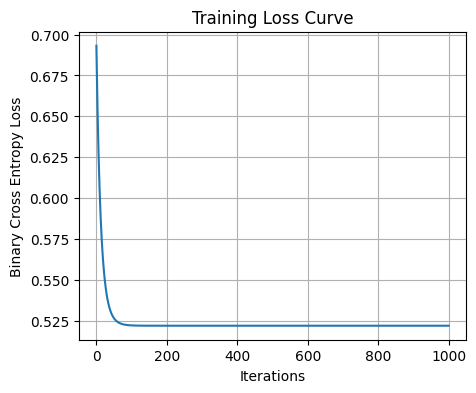

In [18]:
plt.figure(figsize=(5,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()


In [19]:
y_pred = model.predict(X_scaled)

accuracy = np.mean(y_pred == y)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")


Final Training Accuracy: 97.50%


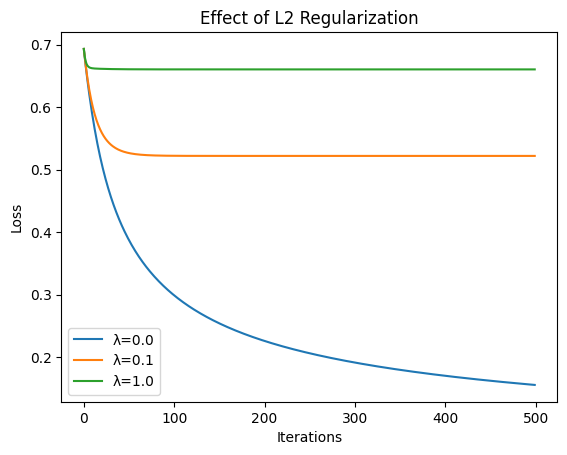

In [20]:
for lam in [0.0, 0.1, 1.0]:
    model = LogisticRegressionRidge(lr=0.1, epochs=500, reg_lambda=lam)
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f"λ={lam}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Effect of L2 Regularization")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [21]:
import numpy as np


In [22]:
np.random.seed(0)
M = np.random.rand(6, 6) * 10
k = 3


In [23]:
def initialize_centroids(M, k):
    flat = M.flatten()
    indices = np.random.choice(len(flat), k, replace=False)
    return flat[indices]


In [24]:
def kmeans_matrix(M, k, max_iters=50):
    n, m = M.shape

    # Initialize
    centroids = initialize_centroids(M, k)
    assignment_table = np.zeros((n, m), dtype=int)

    for _ in range(max_iters):

        for i in range(n):
            for j in range(m):
                distances = np.abs(M[i, j] - centroids)
                assignment_table[i, j] = np.argmin(distances)

        new_centroids = np.zeros(k)
        counts = np.zeros(k)

        for i in range(n):
            for j in range(m):
                cluster = assignment_table[i, j]
                new_centroids[cluster] += M[i, j]
                counts[cluster] += 1

        for c in range(k):
            if counts[c] > 0:
                new_centroids[c] /= counts[c]
            else:
                new_centroids[c] = centroids[c]  # unchanged if empty

        # Convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cookbook[assignment_table[i, j]].append((i, j))

    return assignment_table, cookbook, centroids

In [25]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [26]:
print("Centroids:")
print(centroids)

print("\nAssignment Table:")
print(assignment_table)

print("\nCookbook:")
for c in cookbook:
    print(f"Cluster {c}: {cookbook[c]}")


Centroids:
[5.22756726 1.03336697 8.49688018]

Assignment Table:
[[0 2 0 0 0 0]
 [0 2 2 0 2 0]
 [0 2 1 1 1 2]
 [2 2 2 2 0 2]
 [1 0 1 2 0 0]
 [1 2 0 0 1 0]]

Cookbook:
Cluster 0: [(0, 0), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 3), (1, 5), (2, 0), (3, 4), (4, 1), (4, 4), (4, 5), (5, 2), (5, 3), (5, 5)]
Cluster 1: [(2, 2), (2, 3), (2, 4), (4, 0), (4, 2), (5, 0), (5, 4)]
Cluster 2: [(0, 1), (1, 1), (1, 2), (1, 4), (2, 1), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 5), (4, 3), (5, 1)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
